In [10]:
%load_ext autoreload
%autoreload 2
#%matplotlib widget
#%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import okada_kl_subfaults as okl
import matplotlib.pyplot as plt
import numpy as np

In [12]:
E_subfault=10
N_subfault=10

depth=3.2e4
length=3e5
width=1.5e5
strike=195.0
dip=14.0
rake=87.0


epicenters_E, epicenters_N, epicenters_D = okl.subfaults(E_subfault, N_subfault, dip, strike, length, width)

#print(epicenters_E)

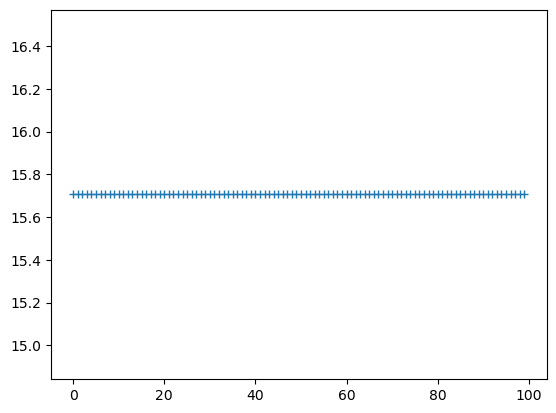

In [13]:
slip=20.0
opening=10.0

aver = []
for i in range(100):
        slips, D, V, z = okl.kl_slipfield(epicenters_E, epicenters_N, epicenters_D, length, width, slip)
        aver.append(np.average(slips))
plt.plot(aver,'+')


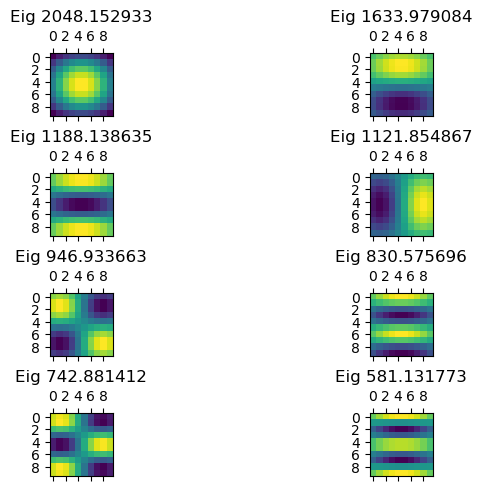

In [14]:
nr = 4
nc = 2
fig, axs = plt.subplots(nr, nc, constrained_layout=True)

axs
for i in range(nr):
    for j in range(nc):
        #print(nc*i+j)
        axs[i,j].matshow(V[:,nc*i+j].reshape(10,10))
        axs[i,j].set_title('Eig %f'% D[nc*i+j,nc*i+j])

In [15]:
extent = 500000
n_extent = 101

#[epicenters_E, epicenters_N, epicenters_D]=newsubfaults(E_subfault,N_subfault, dip, strike, L, W);

#x_subfaults=N_subfault*E_subfault;

# Grid
xvec = np.linspace(-extent,extent,n_extent)
yvec = np.linspace(-extent,extent,n_extent)
x,y = np.meshgrid(xvec,yvec)

uE,uN,uZ, _ = okl.deformation(x, y, xoff=0, yoff=0, E_subfault=10, N_subfault=10)

13.758670899608065
-3.4726531528695865


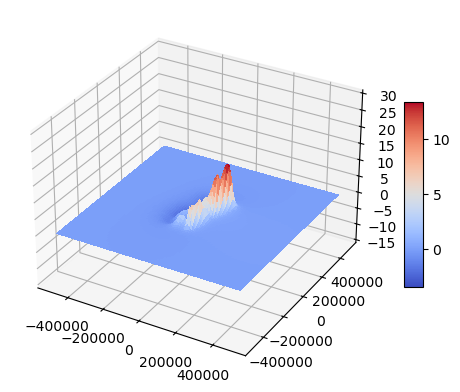

In [16]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x,y,uZ, cmap=cm.coolwarm, antialiased=False, rstride=1, cstride=1)

# Customize the z axis.
ax.set_zlim(-15, 30.0)
ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()

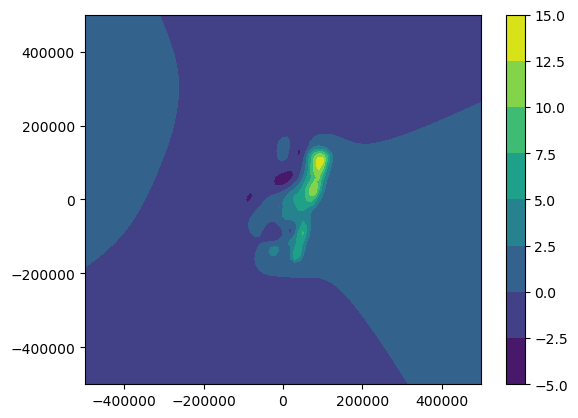

In [17]:
plt.contourf(x,y,uZ)
plt.colorbar()


